### Build a Machine learning pipeline on Titanic dataset

In [89]:
# import the necessary library
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


In [91]:
# Step 1: Load Titanic dataset from scikit-learn's OpenML API
titanic = fetch_openml(name='titanic', version=1)
df = titanic.frame


In [93]:
# Step 2: Preprocess Data
# Features and target
X = df.drop(columns=['survived', 'name', 'ticket', 'cabin', 'embarked'])  # Drop irrelevant columns
y = df['survived']

# Check data types of columns
print(X.dtypes)


pclass          int64
sex          category
age           float64
sibsp           int64
parch           int64
fare          float64
boat           object
body          float64
home.dest      object
dtype: object


In [95]:
# Step 3: Handle Non-Numeric Columns
# Encode 'gender' column as 0 (male) and 1 (female)
X['sex'] = X['sex'].map({'male': 0, 'female': 1})

# For 'pclass', it is a categorical variable but represented numerically
X['pclass'] = X['pclass'].astype('category')
X['pclass'] = X['pclass'].cat.codes  # Convert to numeric codes


In [97]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
# Step 5: Define the preprocessing for numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns


In [101]:
# Step 6: Define preprocessors for numeric and categorical data
numeric_transformer = SimpleImputer(strategy='mean')  # Impute missing numeric data with the mean
categorical_transformer = SimpleImputer(strategy='most_frequent')  # Impute missing categorical data with the most frequent value
# For categorical features, we can use OneHotEncoder to handle non-numeric data
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),  # Handle missing values
    OneHotEncoder(handle_unknown='ignore')    # Convert categorical columns into one-hot encoded format
)


In [103]:
# Step 7: Apply transformations with a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [105]:
# Step 8: Build Machine Learning Pipeline
pipeline = make_pipeline(
    preprocessor,  # Apply the preprocessing steps
    RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest model
)


In [107]:
# Step 9: Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'boat', 'home.dest'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [109]:
# Step 10: Evaluate the model
y_pred = pipeline.predict(X_test)


In [111]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9504


In [113]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[142   2]
 [ 11 107]]


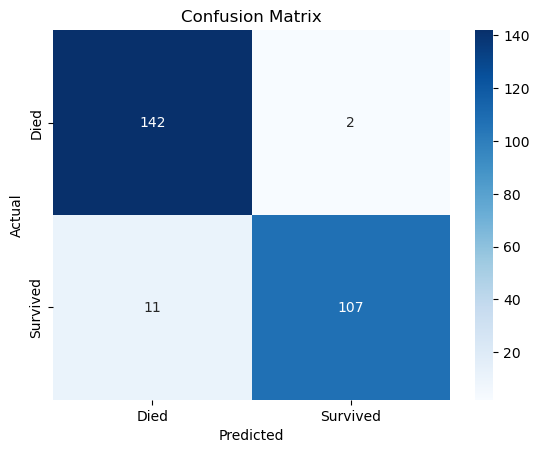

In [115]:

# Step 11: Visualize the Confusion Matrix (Optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
